# Custom Datasets

In [2]:
import torch
from torch import nn

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists")
else:
    print(f"{image_path} does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)


with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
        f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", 'r') as zip_ref:
     print("Unzipping pizza, steak, sushi data...")
     zip_ref.extractall(image_path)   
            

data\pizza_steak_sushi directory already exists
Unzipping pizza, steak, sushi data...


In [5]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data\pizza_steak_sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\test
There are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
There are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\train
There are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza
There are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
There are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi


In [7]:
train_dir = image_path / 'train'
test_dir = image_path / 'test'


Random image path: data\pizza_steak_sushi\train\sushi\1957449.jpg
Image class: sushi
Image height: 512
Image width: 512


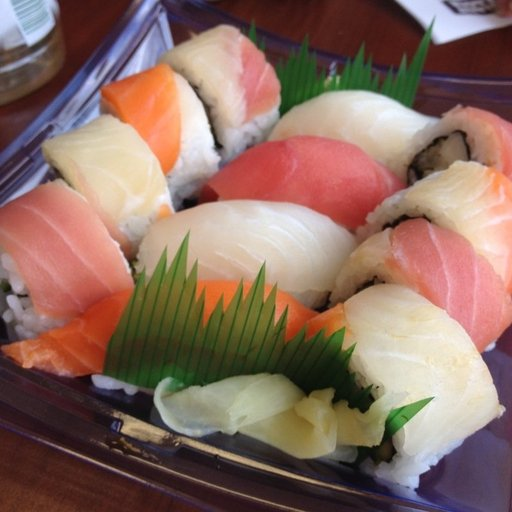

In [8]:
import random
from PIL import Image


#random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)


image_class = random_image_path.parent.stem


img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

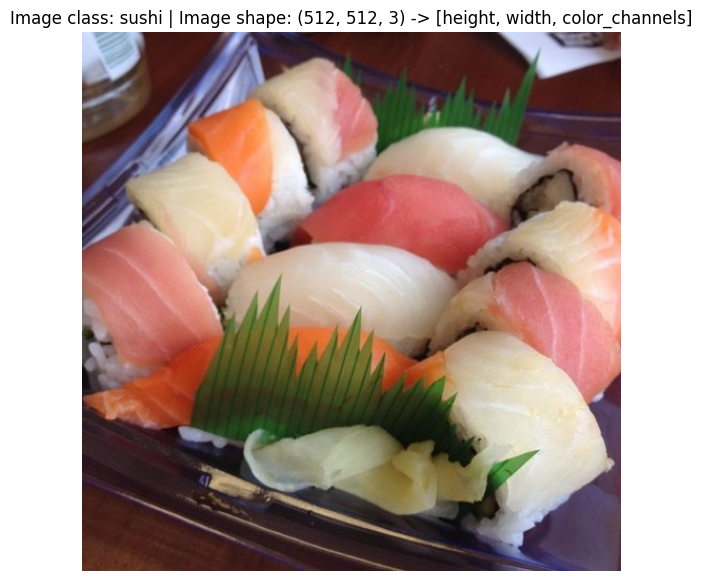

In [9]:
import matplotlib.pyplot as plt
import numpy as np

img_as_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

In [10]:
img_as_array

array([[[205, 218, 252],
        [206, 219, 253],
        [207, 220, 254],
        ...,
        [ 82,  37,  34],
        [ 85,  41,  38],
        [ 88,  44,  41]],

       [[205, 218, 252],
        [206, 219, 253],
        [207, 220, 254],
        ...,
        [ 85,  40,  37],
        [ 89,  45,  42],
        [ 93,  49,  46]],

       [[205, 218, 252],
        [205, 218, 252],
        [207, 220, 254],
        ...,
        [ 89,  44,  39],
        [ 95,  52,  46],
        [100,  57,  51]],

       ...,

       [[100,  53,  37],
        [100,  53,  37],
        [ 98,  49,  34],
        ...,
        [ 68,  41,  60],
        [ 71,  42,  60],
        [ 73,  44,  62]],

       [[ 98,  49,  34],
        [ 99,  50,  35],
        [ 98,  49,  34],
        ...,
        [ 65,  38,  57],
        [ 74,  45,  63],
        [ 74,  45,  63]],

       [[ 93,  44,  29],
        [ 96,  47,  32],
        [ 97,  48,  33],
        ...,
        [ 64,  37,  56],
        [ 76,  47,  65],
        [ 75,  46,  64]]

In [12]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),

    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
]
)

In [16]:
data_transform(img)

tensor([[[0.8078, 0.6863, 0.5961,  ..., 0.3255, 0.3412, 0.3608],
         [0.8000, 0.7529, 0.6235,  ..., 0.3216, 0.3725, 0.4118],
         [0.7843, 0.7686, 0.6784,  ..., 0.5647, 0.4980, 0.4706],
         ...,
         [0.3412, 0.3490, 0.3490,  ..., 0.3333, 0.3451, 0.3412],
         [0.3569, 0.3647, 0.3529,  ..., 0.3412, 0.3490, 0.3412],
         [0.3765, 0.3608, 0.3647,  ..., 0.3529, 0.3569, 0.3333]],

        [[0.8627, 0.7725, 0.7020,  ..., 0.2392, 0.1843, 0.1725],
         [0.8510, 0.8275, 0.7255,  ..., 0.2471, 0.2353, 0.2196],
         [0.8392, 0.8314, 0.7725,  ..., 0.5137, 0.4157, 0.3569],
         ...,
         [0.1725, 0.1804, 0.1765,  ..., 0.2784, 0.2784, 0.2549],
         [0.1765, 0.1843, 0.1765,  ..., 0.2824, 0.2863, 0.2510],
         [0.1882, 0.1843, 0.1843,  ..., 0.2980, 0.2941, 0.2431]],

        [[0.9922, 0.8863, 0.8078,  ..., 0.2392, 0.1765, 0.1569],
         [0.9922, 0.9529, 0.8431,  ..., 0.2471, 0.2196, 0.2078],
         [0.9765, 0.9647, 0.8980,  ..., 0.5647, 0.4314, 0.

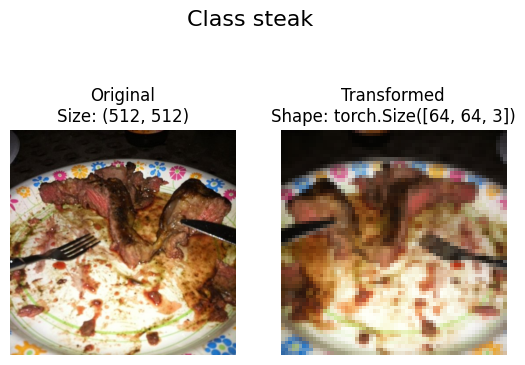

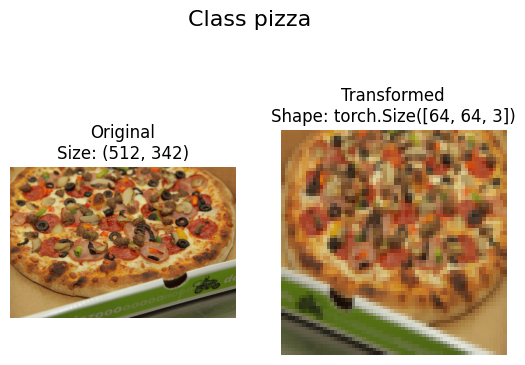

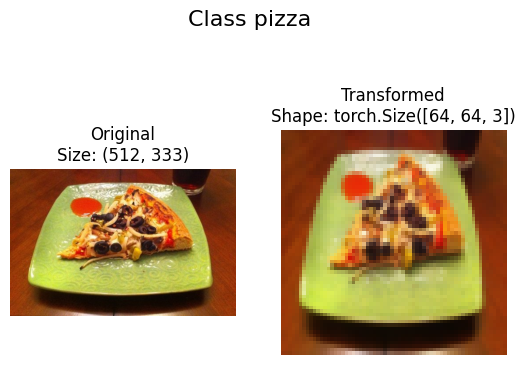

In [22]:
def plot_transormed_images(image_paths, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)  

            transformed_image = transform(f).permute(1,2,0) 
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis(False)
            fig.suptitle(f"Class {image_path.parent.stem}", fontsize=16)


plot_transormed_images(image_paths=image_path_list,
                       transform=data_transform,
                       n=3,
                       seed=None)

In [23]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [25]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [27]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [28]:
len(train_data), len(test_data)

(225, 75)

In [29]:
train_data.samples[0]

('data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0)

In [32]:
img, label = train_data[0][0], train_data[0][1]
img, class_names[label]

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

Original shape: torch.Size([3, 64, 64])
Image permute: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

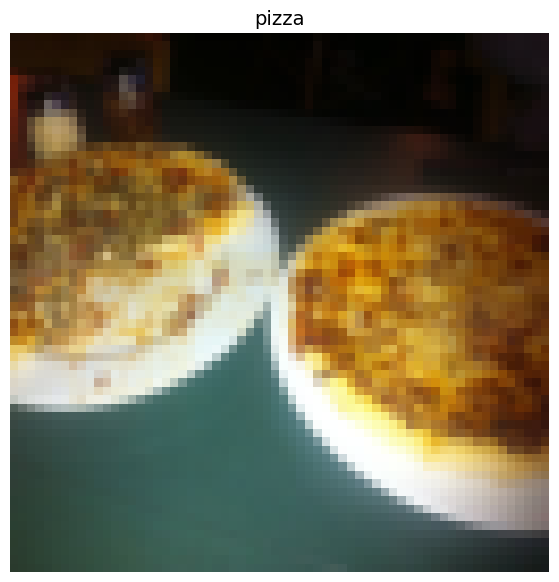

In [33]:
img_permute = img.permute(1,2,0)

print(f"Original shape: {img.shape}")
print(f"Image permute: {img_permute.shape}")

plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis('off')
plt.title(class_names[label], fontsize=14)

In [44]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x23203a8ce30>,
 <torch.utils.data.dataloader.DataLoader at 0x23200e75df0>)

In [45]:

len(train_dataloader), len(test_dataloader)

(225, 75)

In [46]:
img, label = next(iter(train_dataloader))

print(f"Image size: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image size: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [47]:
import os
import pathlib
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [48]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [51]:
target_directory = train_dir
print(target_directory)

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [52]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [53]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    classes  = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure.")
    
    class_to_idx = {class_name:i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [54]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [55]:
class ImageFolderCustom(Dataset):
    def __init__(self, 
                 targ_dir: str, 
                 transform=None):
        super().__init__()
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)


    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    
    def __len__(self) -> int:
        return len(self.paths)
    
    def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]
        if self.transform:
            return self.transform(img), class_idx
        else: 
            return img, class_idx


In [56]:
train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x23203c9fc80>,
 <__main__.ImageFolderCustom at 0x2327fd363f0>)

In [59]:
len(train_data), len(train_data_custom)

(225, 225)

In [ ]:
len(test_data), len(test_data_custom)

(75, 75)

In [61]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [67]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    if n > 10:
        n = 10
        display_shape = False
        print(f"For displpay, purposes, n shouldn't be larger than 10, setting to 10")

    if seed:
        random.seed(seed)


    random_samples_idx = random.sample(range(len(dataset)), k=n)

    plt.figure(figsize=(16,8))


    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        targ_image_adjust = targ_image.permute(1,2,0)

        plt.subplot(1,n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)        

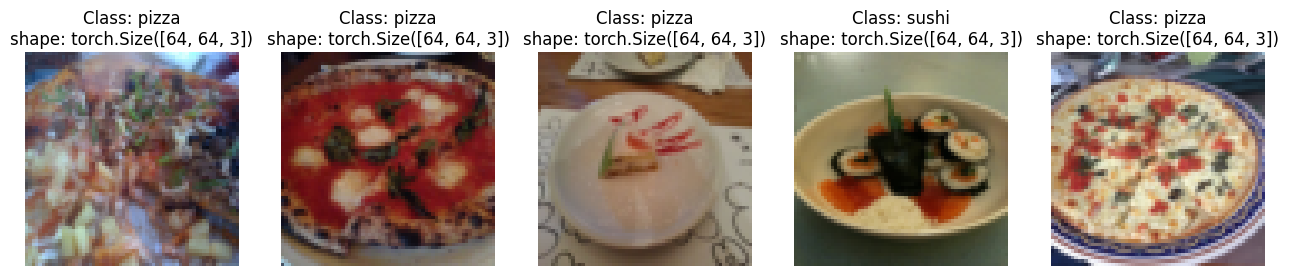

In [70]:
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

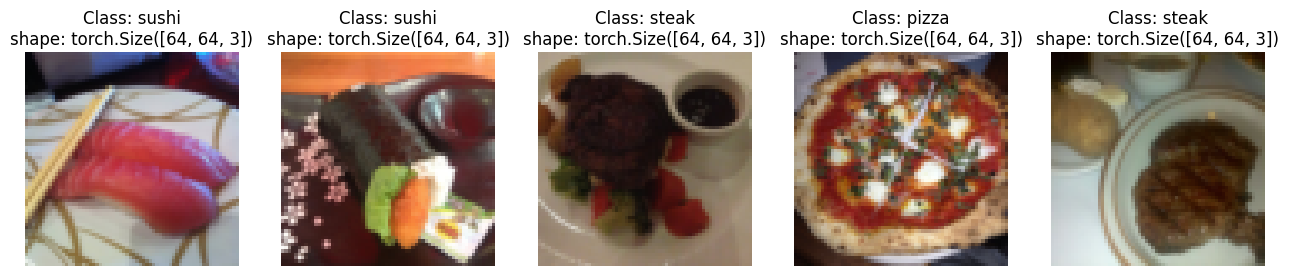

In [71]:
display_random_images(train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=None)

In [ ]:
22.21